In [ ]:
import os
import sys

style_dir = 'results/mpl_style/physrev_mplstyle/physrev.mplstyle'

from wrappers.orca_wrappers import orca_load
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd


%matplotlib inline
%config InlineBackend.figure_format='retina' 

plt.style.use(style_dir)
plt.rcParams['figure.dpi'] = "300"

In [2]:
df = pd.read_csv('testing_suite/oxirane/results/results.csv')
df


,Unnamed: 0,sf-only-1,mds-only-1,mds-1,raw-1,sf-only-2,mds-only-2,mds-2,raw-2
0,0,0.334001,0.361346,0.373735,0.039292,0.012885,0.017380,0.007455,0.480399
1,1,0.228940,0.203657,0.196300,0.336820,0.012717,0.014514,0.006111,0.553417
2,2,0.031107,0.069093,0.072181,0.395263,0.020854,0.029892,0.020177,0.504584
3,3,0.171190,0.232794,0.264894,0.323582,0.009755,0.015630,0.012637,0.721498
4,4,0.033996,0.048791,0.053382,0.522529,0.005461,0.016935,0.006126,0.388658
...,...,...,...,...,...,...,...,...,...
120,120,0.261442,0.273483,0.276440,0.130114,0.008498,0.016337,0.010249,0.323506
121,121,0.142762,0.180810,0.188211,0.380665,0.036797,0.019520,0.022750,0.690589
122,122,0.217428,0.206895,0.214996,0.170849,0.038472,0.027503,0.029480,0.608844
123,123,0.116326,0.132524,0.139594,0.549119,0.006998,0.020284,0.023378,0.505218


/tmp/ipykernel_3726839/3504473790.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


[Text(0, 0, 'SF Model'),
 Text(1, 0, 'MD Model'),
 Text(2, 0, 'Combined Model'),
 Text(3, 0, 'Scratch Model')]

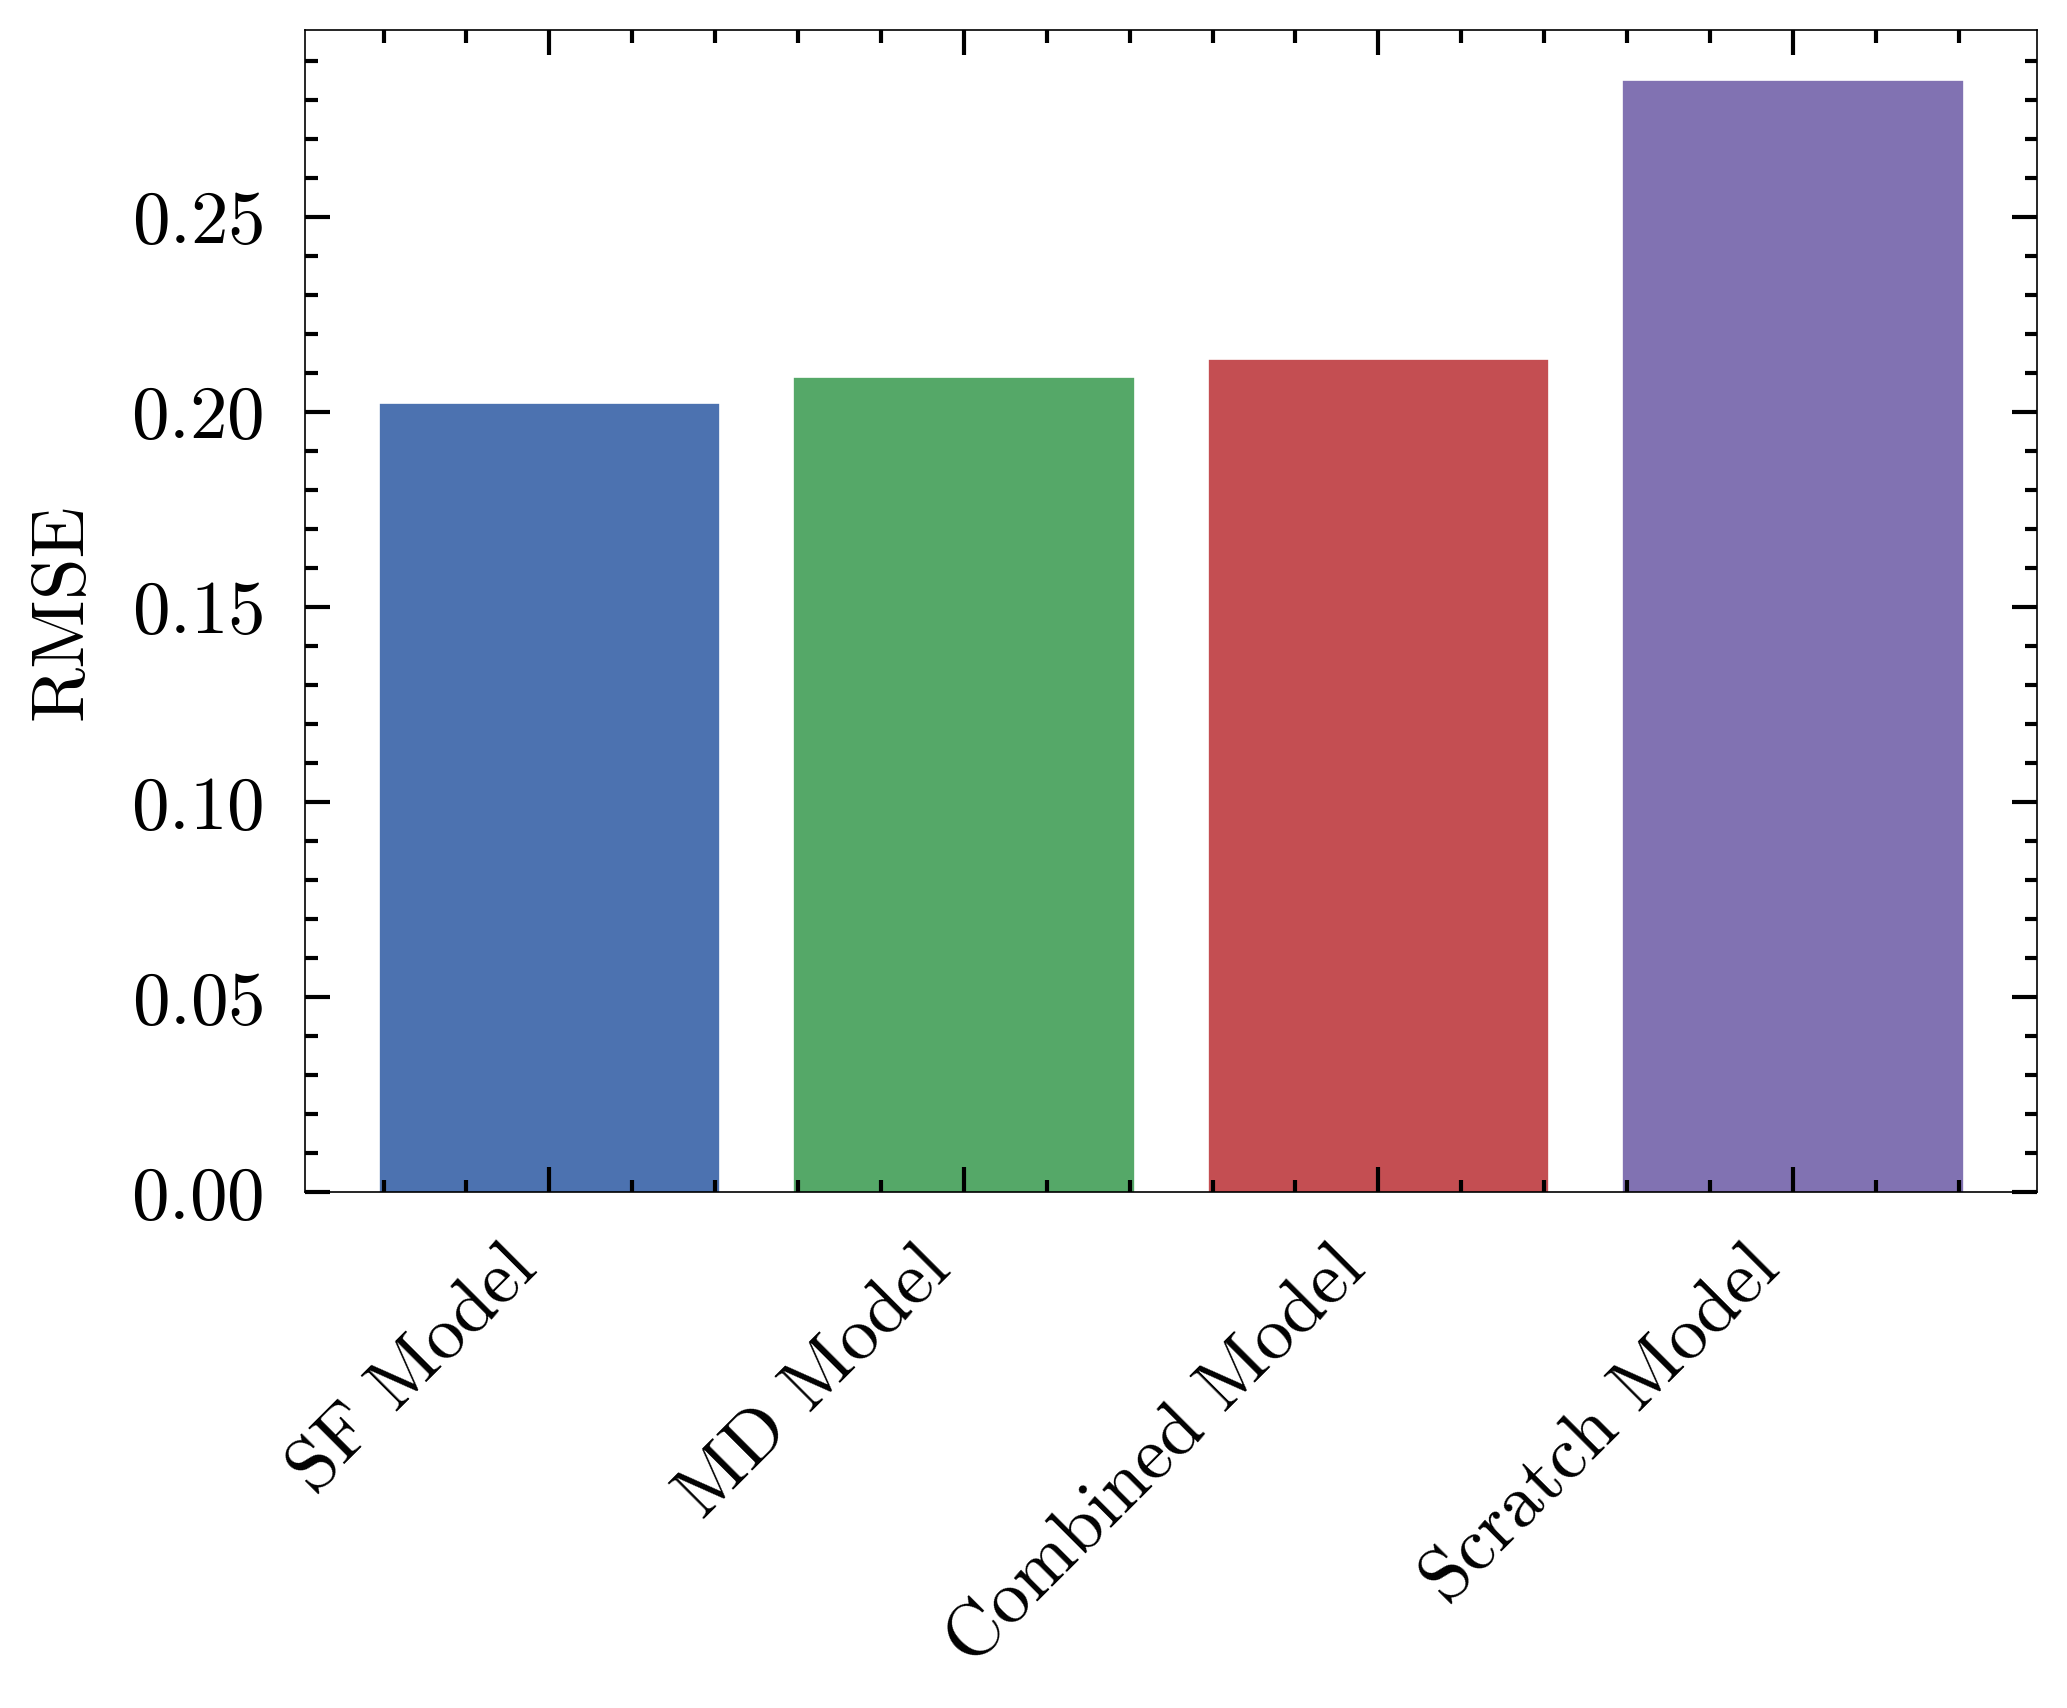

In [ ]:
figure = plt.figure(figsize=(3.5, 2.5))
ax = figure.add_subplot(111)

name_dict = {'raw-1' : 'Scratch Model', 'md-1': 'MD Model', 'isolated-1' : 'SF Model', 'combined-1': 'Combined Model',
             'raw-2' : 'Scratch Model', 'md-2': 'MD Model', 'isolated-2' : 'SF Model', 'combined-2': 'Combined Model'}

rmse_data = []
for column in df.columns[1:5]:
    rmses = df[column].tolist()
    rmse = sum(rmses) / len(rmses)
    model_name = name_dict.get(column, column)  
    rmse_data.append((model_name, rmse))

rmse_data.sort(key=lambda x: x[1])
model_names, rmse_values = zip(*rmse_data)

bars = ax.bar(model_names, rmse_values)

for bar, color in zip(bars, plt.rcParams['axes.prop_cycle'].by_key()['color']):
    bar.set_color(color)

ax.set_ylabel('RMSE')
ax.set_xticklabels(model_names, rotation=45, ha='right')


sf-only-2
mds-only-2
mds-2
raw-2


/tmp/ipykernel_3726839/304040594.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


[Text(0, 0, 'Combined Model'),
 Text(1, 0, 'MD Model'),
 Text(2, 0, 'SF Model'),
 Text(3, 0, 'Scratch Model')]

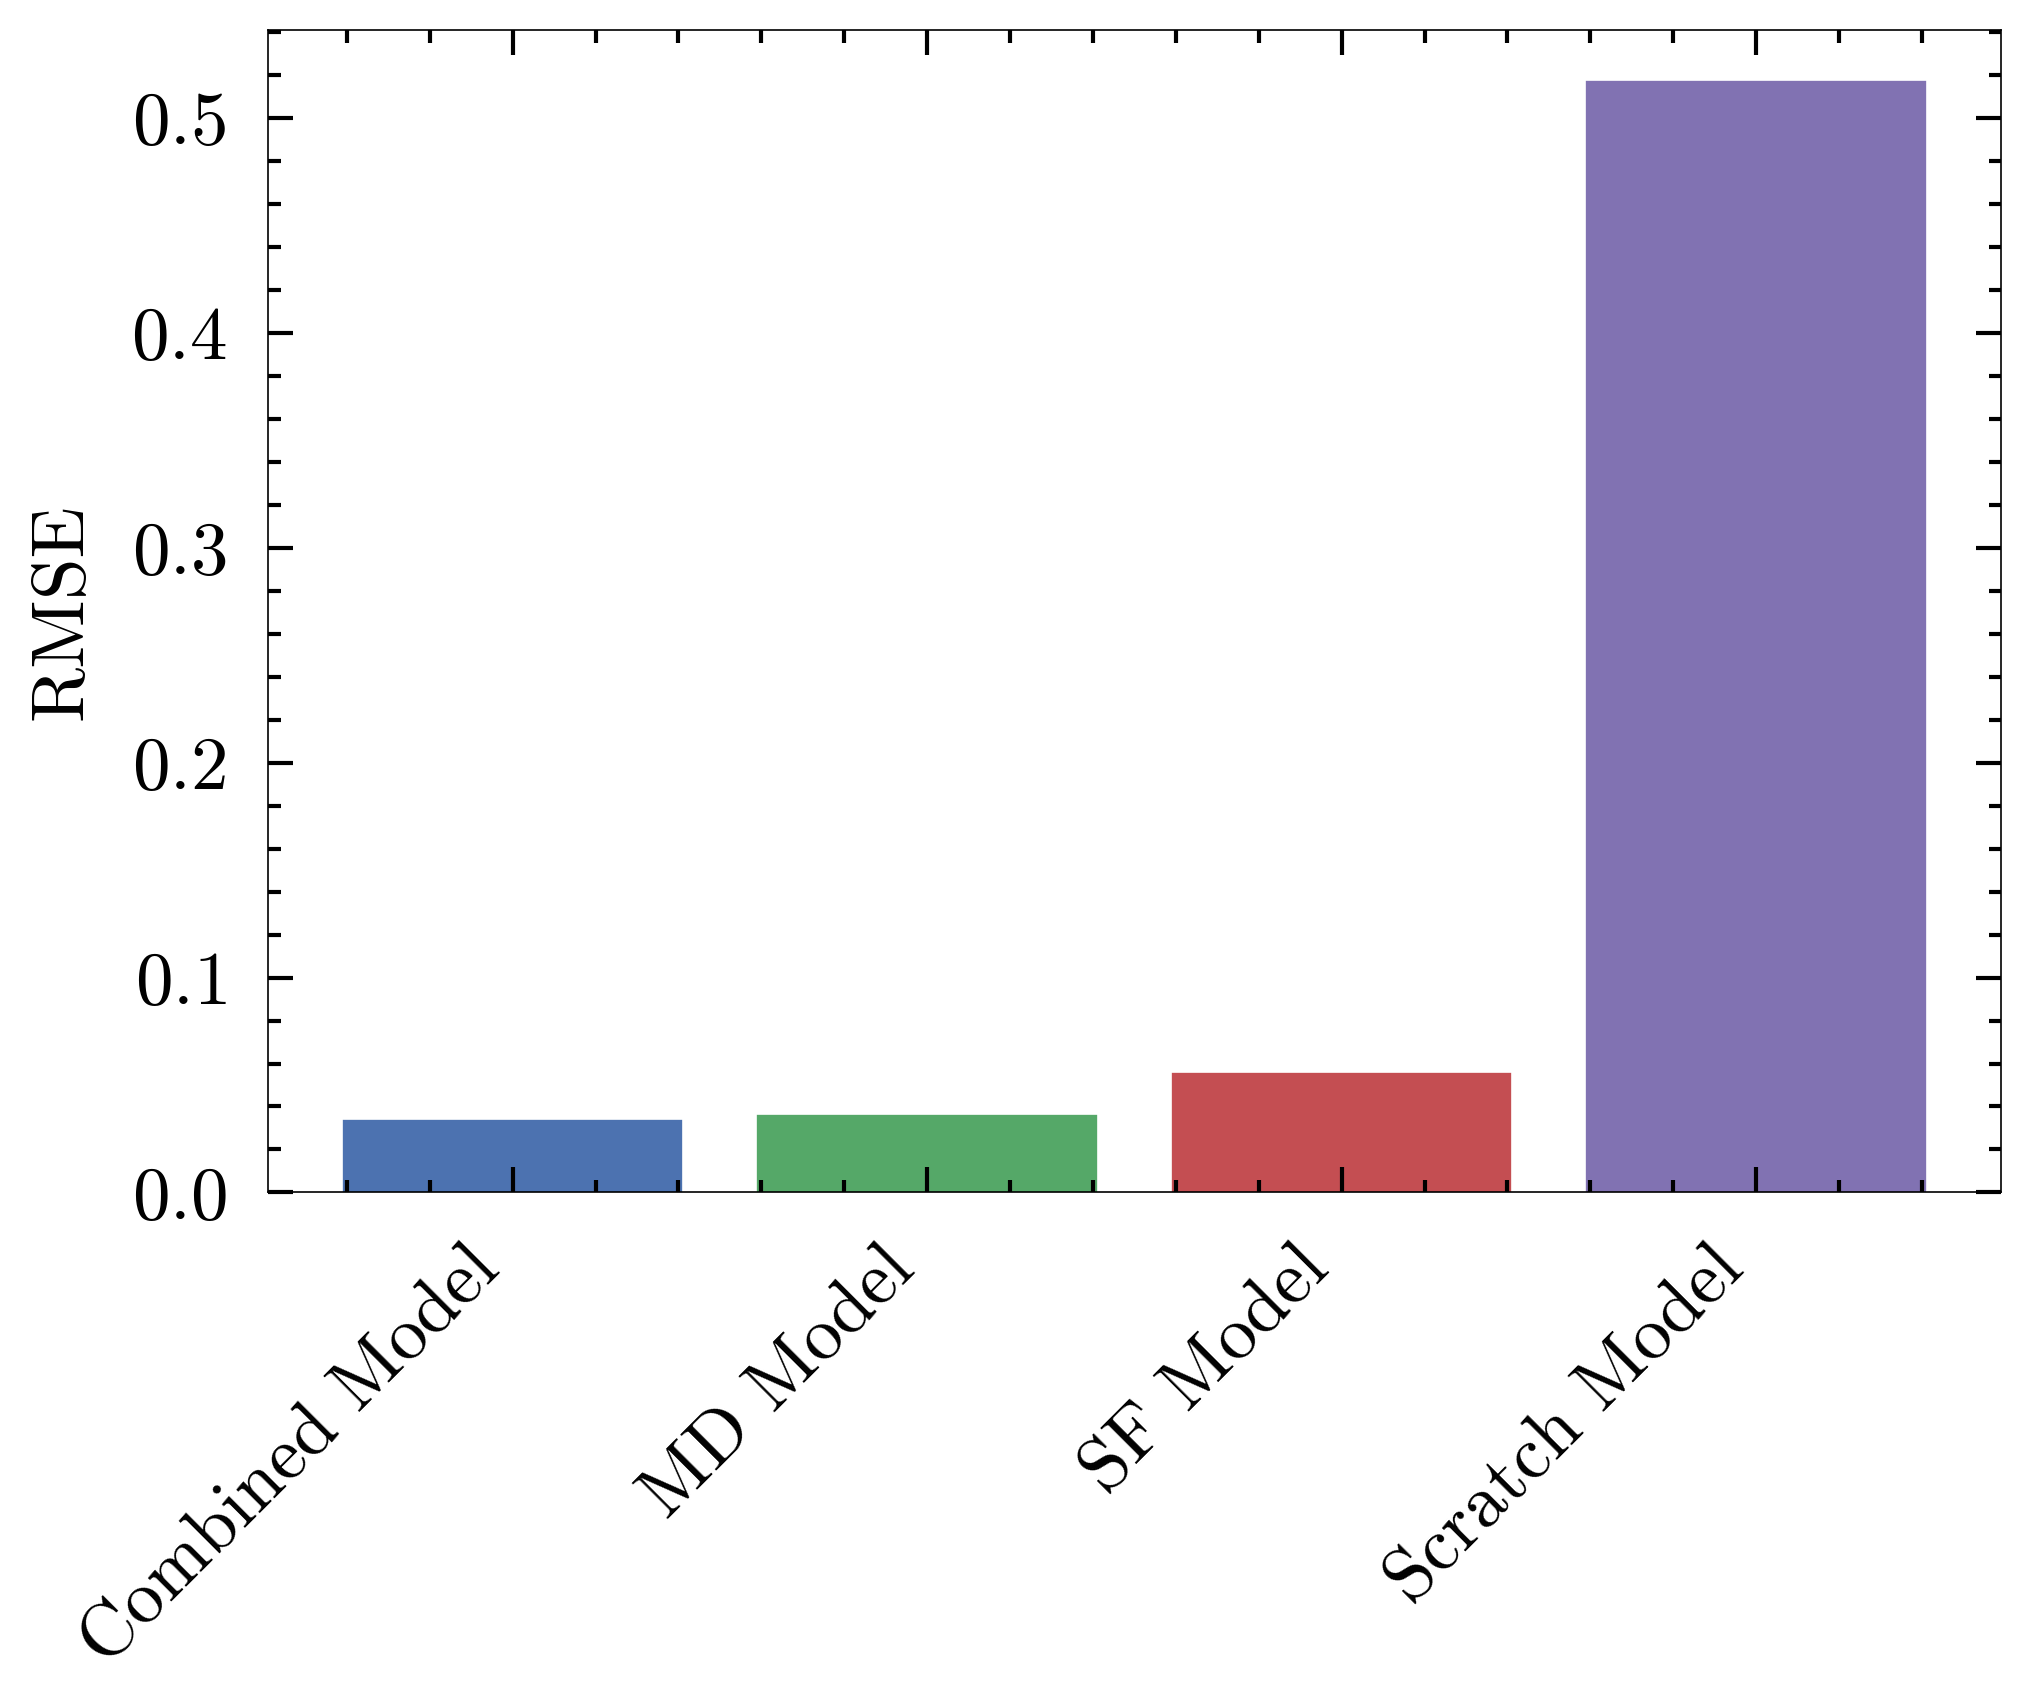

In [ ]:
figure = plt.figure(figsize=(3.5, 2.5))
ax = figure.add_subplot(111)

name_dict = {'raw-1' : 'Scratch Model', 'md-1': 'MD Model', 'isolated-1' : 'SF Model', 'combined-1': 'Combined Model',
             'raw-2' : 'Scratch Model', 'md-2': 'MD Model', 'isolated-2' : 'SF Model', 'combined-2': 'Combined Model'}

rmse_data = []
for column in df.columns[5:]:
    rmses = df[column].tolist()
    rmse = sum(rmses) / len(rmses)
    model_name = name_dict.get(column, column)  
    rmse_data.append((model_name, rmse))
    print(column)

rmse_data.sort(key=lambda x: x[1])
model_names, rmse_values = zip(*rmse_data)

bars = ax.bar(model_names, rmse_values)

for bar, color in zip(bars, plt.rcParams['axes.prop_cycle'].by_key()['color']):
    bar.set_color(color)

ax.set_ylabel('RMSE')
ax.set_xticklabels(model_names, rotation=45, ha='right')